In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import copy

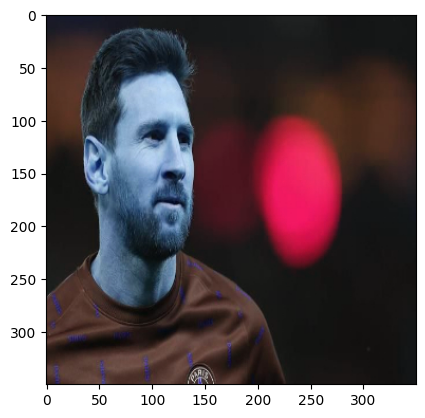

In [32]:
img = cv2.imread('messi2.jpg')
plt.imshow(img)

BGR to RGB using Nested loops

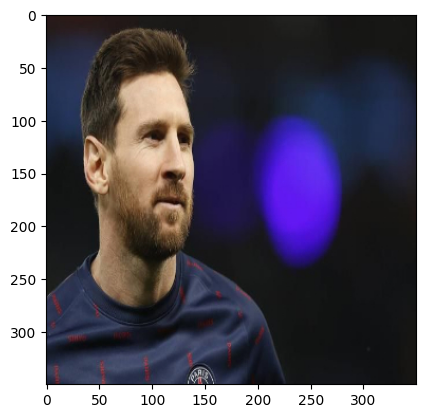

In [33]:
rgb_converted = copy.deepcopy(img)

def bgr_to_rgb(bgr):

    bgr = np.array(bgr)

    rgb = copy.deepcopy(bgr)
    rgb[0][0][0] = bgr[0][0][2]
    rgb[0][0][1] = bgr[0][0][1]
    rgb[0][0][2] = bgr[0][0][0]
    
    return rgb
    

h = img.shape[0]
w = img.shape[1]
d = img.shape[2]


for x in range(0,h):
    #Search each pixel in the row
    for y in range(0,w):
        #Search each pixel in the column
        rgb_converted[x][y]= bgr_to_rgb([[img[x][y]]])


plt.imshow(rgb_converted)

(350, 350, 3)

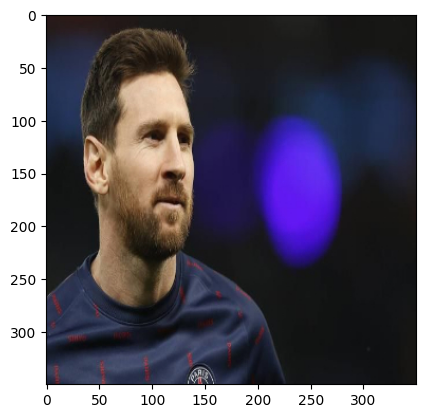

In [34]:
#Assigning the converted image to img
img = rgb_converted
plt.imshow(img)
img.shape

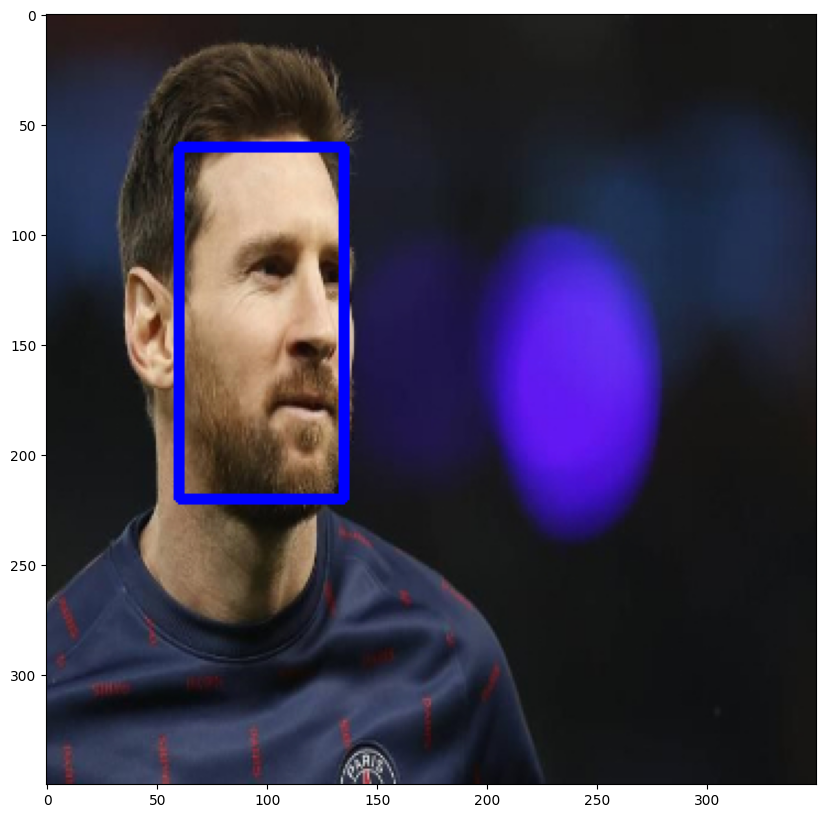

In [35]:
#rectangle 
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

top_left = (60,60)
bottom_right = (135,220)
rect_color = (255,0,0)
thickness = 3
img_rect = cv2.rectangle(img, top_left, bottom_right, rect_color, thickness)
img_rect = cv2.cvtColor(img_rect , cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(10,10))
plt.imshow(img_rect)

(350, 350)

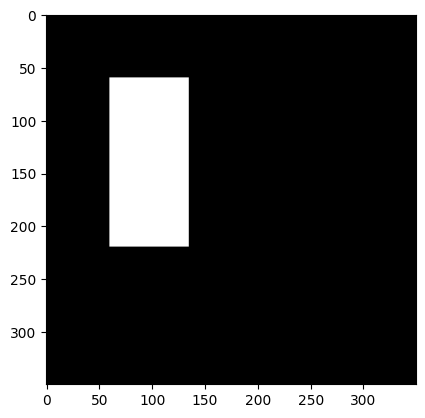

In [36]:
# create a black mask
mask = np.zeros(img.shape[:2], np.uint8)

# add white portion of the mask
mask[60:220, 60:135] = 255

# show the mask
plt.imshow(mask, cmap="gray")

mask.shape

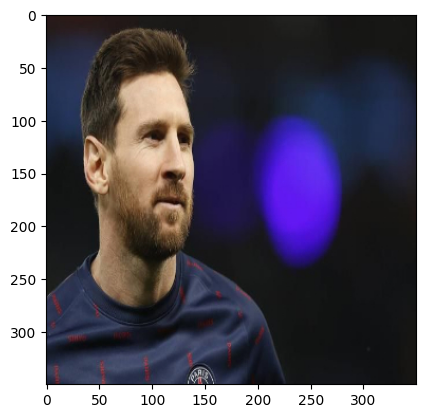

In [37]:
# reimport image
img = cv2.imread("messi2.jpg", 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

RGB to HSV using Nested loops


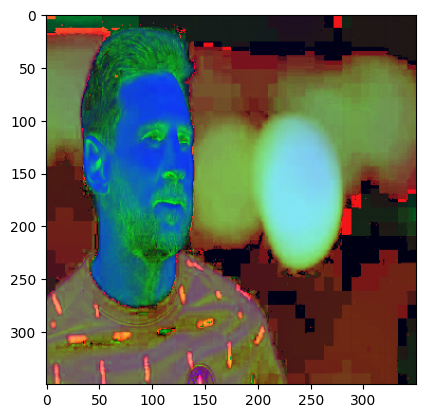

In [38]:
# make a deep copy of the image
hsv = copy.deepcopy(img)

def rgb_to_hsv(rgb):
    # print("received rgb:", rgb)
    # converting values from 0-255 to 0-1
    rgb = np.array(rgb)/255

    # initializing H,S,V values
    h=0.0
    s=0.0
    v=0.0

    # from formula, v is the maximum of rgb
    v=np.max(rgb)

    # for convinience
    vMin=np.min(rgb)
    diff = (v-vMin)

    # calculate saturation from formula
    if(v>0.0):
        s=(v-vMin)/v
    else:
        s=0.0
    
    # if r,g,b equal 
    if(rgb[0][0][0] == rgb[0][0][1] and rgb[0][0][1] == rgb[0][0][2]):
        h = 0
    # Is the point within +/- 60 degrees of the red axis
    elif(rgb[0][0][0] == v):
        h = 60 * (rgb[0][0][1] - rgb[0][0][2]) / diff
    # Is the point within +/- 60 degrees of the green axis
    elif(rgb[0][0][1] == v):
        h = 120 + 60 * (rgb[0][0][2] - rgb[0][0][0]) / diff
    # IS the point within +/- 60 degrees of the blue axis
    elif(rgb[0][0][2] == v):
        h = 240 + 60 * (rgb[0][0][0] - rgb[0][0][1]) / diff
    
    h=h/2

    # interp s,v values from 0-1 to 0-255
    s=np.interp(s,[0,1],[0,255])
    v=np.interp(v,[0,1],[0,255])
    
    # Return H,S,V and round them to integers
    return np.array([[[round(h),round(s),round(v)]]])


h = img.shape[0]
w = img.shape[1]
d = img.shape[2]



for x in range(0,h):
    #Search each pixel in the row
    for y in range(0,w):
        #Search each pixel in the column
        hsv[x][y]= rgb_to_hsv([[img[x][y]]])


#cv2.imshow(hsv)
plt.imshow(hsv)
#assigning hsv values to img 
img = hsv 

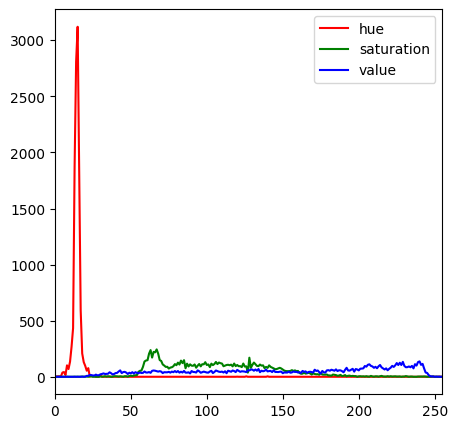

In [39]:

fig = plt.figure(figsize=(5,5))

# hue
hist = cv2.calcHist([img],[0],mask,[256],[0,255])
plt.plot(hist, color="red")
plt.xlim([0,255])

# # saturation
hist = cv2.calcHist([img],[1],mask,[256],[0,255])
plt.plot(hist, color="green")
plt.xlim([0,255])

# value
hist = cv2.calcHist([img],[2],mask,[256],[0,255])
plt.plot(hist, color="blue")
plt.xlim([0,255])

plt.legend(('hue','saturation','value'),loc = 'upper right')
plt.show()


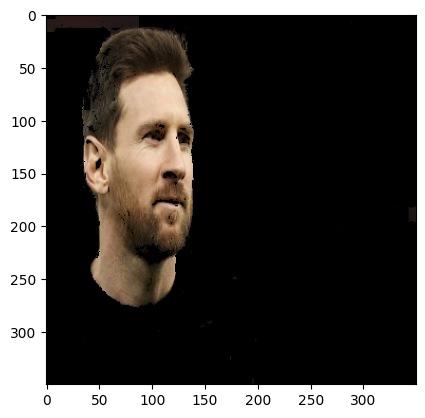

In [41]:
# min and max HSV values.
min_HSV = np.array([0,50,25], np.uint8)
max_HSV = np.array([25,185,255], np.uint8)

skinArea = cv2.inRange(hsv, min_HSV, max_HSV)

# bitwise-AND mask
skinHSV = cv2.bitwise_and(hsv,hsv, mask=skinArea)

skinHSV = cv2.cvtColor(skinHSV, cv2.COLOR_HSV2RGB)
plt.imshow(skinHSV)
